# Example 1: Reading SUMMA output

This jupyter notebook demonstrates how to read SUMMA NetCDF output using the python package `xarray` and shows some simple plots. The example is based on output from the `celia1990` test case in `summaTestCases` (`summaTestCases/settings/syntheticTestCases/celia1990`).

The SUMMA version that was used to produce the model runs in this notebook is 
```
----------------------------------------------------------------------
     SUMMA - Structure for Unifying Multiple Modeling Alternatives    
                              Version: 
               Build Time: Mon Mar 13 20:55:47 UTC 2017
                    Git Branch: docker-0-g10c858b
          Git Hash: 10c858b60afe3a5979a23c6dd7e4238e64bb1494
----------------------------------------------------------------------
```

## python installation

The easiest way to install and maintain python on your machine is to use the [Anaconda](https://www.continuum.io/downloads) distribution. SUMMA writes its output in the form of [NetCDF](http://www.unidata.ucar.edu/software/netcdf/), which is widely used in atmospheric sciences and these days in hydrology as well. The advantages are that the storage format can be read unambiguously on different machines and that metadata can be stored as part of the datafile. This allows for a self-describing file and the construction of generalized analysis and plotting software. Many commonly used plotting and analysis packages include libraries for reading / writing NetCDF files. There are also some useful command-line packages that let you manipulate NetCDF files, in particular the [NCO Toolkit or nco](http://nco.sourceforge.net/), which consists of a collection of utilities, and the [Climate Data Operators or cdo](https://code.zmaw.de/projects/cdo).

For python, the [xarray](http://xarray.pydata.org) package provides very nice functionality for manipulating and displaying NetCDF file content.

## setup

### jupyter notebook magic 

In [1]:
%matplotlib inline

### python imports

We only need a few python packages for this example. 
 * [seaborn](https://seaborn.pydata.org/) is for statistical data visualization and mainly just enhances the plot style (for our purpose here)
 * [xarray](http://xarray.pydata.org) provides N-D labeled arrays and datasets in python.
 * [numpy](http://www.numpy.org/) is the fundamental package for scientific computing with python.
 * [matplotlib](https://matplotlib.org/) is the most commmonly used 2D plotting library for python.
 * [matplotlib.pyplot](https://matplotlib.org/api/pyplot_summary.html) provides `matlab`-like plotting capabilities.


In [2]:
import seaborn as sns
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

### plot settings 

Define colors (other than the default RGB)

In [3]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))

## analysis

### ingest and inspect

Ingest the NetCDF output file from the `celia1990` test case into an `xarray` Dataset (`ds`). The output file can be found in `summaTestCases/output/syntheticTestCases/celia1990`. The convention is for NetCDF files to end with the extension `.nc`.

To make the test case easier to plot it is useful to add an extra variable to the output file. Before running the test case, add the line

`mLayerHeight              | 1 `

to the file `summaTestCases/settings/meta/Model_Output.txt`. If you look in the `summaTestCases/output/syntheticTestCases/celia1990/summa_fileManager_celia1990.txt` file then you will see that this file controls the variables that are printed in the output.

In [4]:
infile = '/Users/nijssen/Dropbox/courses/CEE599S/Spring2017/SUMMA/summaTestCases/output/syntheticTestCases/celia1990/celia1990_2000-01-01-00_spinup_testSumma_1.nc'

In [5]:
ds = xr.open_dataset(infile)

It is easy to inspect the contents of the NetCDF file by inspecting the dataset `ds`. For example, the global attributes of the input file provide a listing of the model decisions that were made to construct the model that is used in the `celia1990` test case.

In [6]:
ds.attrs

OrderedDict([('soilStress', 'NoahType'),
             ('stomResist', 'BallBerry'),
             ('num_method', 'itertive'),
             ('fDerivMeth', 'analytic'),
             ('LAI_method', 'monTable'),
             ('notPopulatedYet', 'notPopulatedYet'),
             ('f_Richards', 'mixdform'),
             ('groundwatr', 'noXplict'),
             ('hc_profile', 'constant'),
             ('bcUpprTdyn', 'zeroFlux'),
             ('bcLowrTdyn', 'zeroFlux'),
             ('bcUpprSoiH', 'presHead'),
             ('bcLowrSoiH', 'presHead'),
             ('veg_traits', 'CM_QJRMS1998'),
             ('canopyEmis', 'difTrans'),
             ('snowIncept', 'lightSnow'),
             ('windPrfile', 'logBelowCanopy'),
             ('astability', 'louisinv'),
             ('canopySrad', 'CLM_2stream'),
             ('alb_method', 'varDecay'),
             ('snowLayers', 'CLM_2010'),
             ('compaction', 'anderson'),
             ('thCondSnow', 'jrdn1991'),
             ('thCondSoil', 'm

Similarly, we can get information about the dimensions of the NetCDF files. Note that dimensions are essentially like coordinate axes. Each variable in the NetCDF file is associated with one or more dimensions.

In [7]:
ds.dims

Frozen(SortedKeysDict({'midSoilAndTime': 12720, 'hru': 1, 'ifcTotoAndTime': 12720, 'time': 120, 'ifcSoilAndTime': 12720, 'midTotoAndTime': 12720}))

The data variables in the NetCDF file can similarly be listed. Each variable is associated with one more dimensions.

In [8]:
ds.data_vars

Data variables:
    pptrate                  (time, hru) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    airtemp                  (time, hru) float64 283.2 283.2 283.2 283.2 ...
    basin__SurfaceRunoff     (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    basin__ColumnOutflow     (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    basin__AquiferStorage    (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    basin__AquiferRecharge   (time) float64 3.157e-12 3.157e-12 3.157e-12 ...
    basin__AquiferBaseflow   (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    basin__AquiferTranspire  (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    averageInstantRunoff     (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    averageRoutedRunoff      (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    nSnow                    (time, hru) int32 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
    nSoil                    (time, hru) int32 100 100 100 100 100 100 100 ...
    nLayers                 

Each variable also has its own set of attributes. For example

In [9]:
ds.scalarSurfaceTemp.attrs

OrderedDict([('long_name',
              'surface temperature (just a copy of the upper-layer temperature) (instant)'),
             ('units', 'K')])

### SUMMA dimensions

At first glance the dimensions in the SUMMA NetCDF files can be a bit confusing. The `celia1990` output file has six dimensions. Two of these are pretty self-evident:
 * `time` is the time dimension
 * `hru` is the dimension along which the hrus vary (in this case there is only one hru)
 
The other four dimensions indicate how quantities vary in the vertical direction. The complication arises because SUMMA allows the number of layers in the vertical to vary in certain model configurations. For example, the number of snow layers can vary as snow accumulates and melts. Ideally, variables associated with these layers would vary as a function of `(time, layer)`, but the time-varying number of layers results in a ragged array, which is not natively supported by NetCDF (at least not in older versions). Instead, in SUMMA, variables that vary with `time` and `layer` are organized by providing information for all the layers for time `t`, following by information for all the layers for time `t+1`. By writing the layers "_end-to_end_" and by keeping track of the index that indicates the start of each layer for each time step, we can then unpack this information when we read the file.

The `celia1990` test case has four of these dimenions:
 * `ifcSoilAndTime`
 * `ifcTotoAndTime`
 * `midSoilAndTime`
 * `midTotoAndTime`

Generally two others exist (in case snow is present): `ifcSnowAndTime` and `midSnowAndTime`.

The dimensions indicated by `ifc` are associated with variables that are specified at the interfaces between layers (for example flux into or out of a layer), while dimensions indicated by `mid` are associated with variables that are specified at the mid-point of each layer (or layer-average). `Snow`, `Soil`, `Toto`, and indicate snow layers, soil layers, and all layers, respectively.

Each dimension then has associated variables to help with unpacking the information:
 * `ifcSnowStartIndex` (not present in the `celia1990` output file)
 * `ifcSoilStartIndex`
 * `ifcTotoStartIndex`
 * `midSnowStartIndex` (not present in the `celia1990` output file)
 * `midSoilStartIndex`
 * `midTotoStartIndex`

These variables indicate for each time, what the starting location is in the corresponding `[ifc|mid][Snow|Soil|Toto]andTime` vector. Keep in mind that the indexing is `1`-based, that is, the first index is `1` rather than `0`, following Fortran (or matlab) rather than C (or python) convention.

The number of layers for each timestep is given by `nSnow`, `nSoil`, or `nLayers` (`Toto`). Below we'll show how to use this layer information to extract variables associated with each layer. `mLayerHeight` and `iLayerHeight` show the thickness of each layer and the cumulative depth of the layer interfaces, respectively.

### simple plots of 1-D variables

Plotting variables that are only associated with a single dimension is straightforward, especially if you use a package like `xarray` or `pandas` which knows how to interpret time units. For example, to plot the variable `airtemp` is a single command (note that you would need to select the hru if there is more than one).

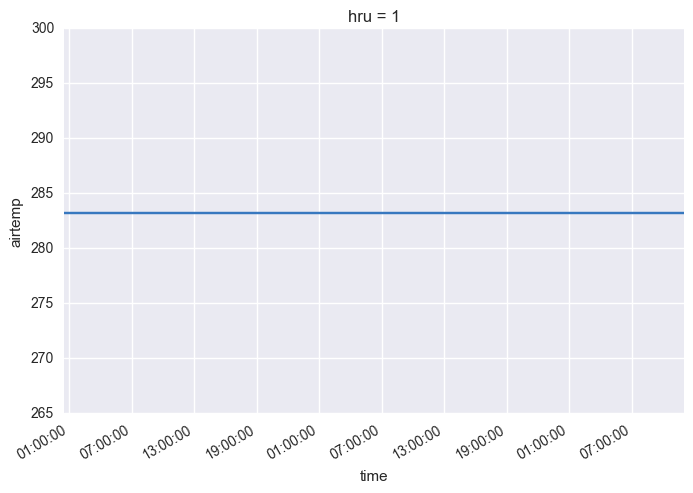

In [10]:
ds.airtemp.plot() # or ds.airtemp[:,0].plot() where 0 indicates the first HRU

This plot is not all that interesting, since the air temperature does not vary in this synthetic test case. 

Here is another example. Note that a long name for the variable as well as units information can be obtained directly from the NetCDF file and used to modify the plot.

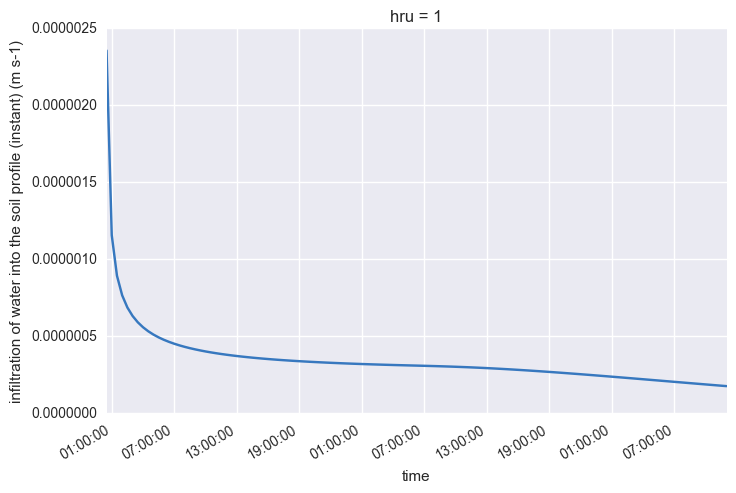

In [11]:
ds.scalarInfiltration.plot()
plt.ylabel('{} ({})'.format(ds.scalarInfiltration.long_name, ds.scalarInfiltration.units))

### plots of variables that vary with depth

As described above, these variables are represented as ragged arrays and you need to do a bit of extra work to extract the information for plotting. Once you know what to look for this is not as complicated as it sounds.

Let's take a look at the variable `mLayerVolFracWat`

In [12]:
ds.mLayerVolFracWat

<xarray.DataArray 'mLayerVolFracWat' (midTotoAndTime: 12720, hru: 1)>
array([[  1.979244e-01],
       [  1.927665e-01],
       [  1.874536e-01],
       ..., 
       [  9.969210e+36],
       [  9.969210e+36],
       [  9.969210e+36]])
Coordinates:
  * hru      (hru) int32 1
Dimensions without coordinates: midTotoAndTime
Attributes:
    long_name: volumetric fraction of total water in each layer (instant)
    units: -

This variable has the long name `volumetric fraction of total water in each layer (instant)` and is unitless. It varies along the `midTotoAndTime` and `hru` dimensions. 

The variable `midTotoStartIndex` indicates the position along that dimension for each new time step. Consequently, this variable only varies as a function of time. Once again, keep in mind that the indices are 1-based, so the first value is index 1.

In [13]:
ds.midTotoStartIndex

<xarray.DataArray 'midTotoStartIndex' (time: 120, hru: 1)>
array([[    1],
       [  101],
       [  201],
       [  301],
       [  401],
       [  501],
       [  601],
       [  701],
       [  801],
       [  901],
       [ 1001],
       [ 1101],
       [ 1201],
       [ 1301],
       [ 1401],
       [ 1501],
       [ 1601],
       [ 1701],
       [ 1801],
       [ 1901],
       [ 2001],
       [ 2101],
       [ 2201],
       [ 2301],
       [ 2401],
       [ 2501],
       [ 2601],
       [ 2701],
       [ 2801],
       [ 2901],
       [ 3001],
       [ 3101],
       [ 3201],
       [ 3301],
       [ 3401],
       [ 3501],
       [ 3601],
       [ 3701],
       [ 3801],
       [ 3901],
       [ 4001],
       [ 4101],
       [ 4201],
       [ 4301],
       [ 4401],
       [ 4501],
       [ 4601],
       [ 4701],
       [ 4801],
       [ 4901],
       [ 5001],
       [ 5101],
       [ 5201],
       [ 5301],
       [ 5401],
       [ 5501],
       [ 5601],
       [ 5701],
       [ 5801

The variable `nLayers` indicates how many layers are "_active_" during each time step. Note that if the variable was one of the `Snow` or `Soil` start indices, then `nSnow` or `nSoil` rather than `nLayers` would need to be consulted. All this to say that you need to look at the dimensions associated with a variable.

Thus, to extract (and plot) the values of `mLayerVolFracWat` during the first time step, we can use the following steps

In [21]:
timestep = 10 # python indices are 0-based, so this is the first time step

In [22]:
layers = ds.nLayers[timestep].values[0] # extract the number of layers associated with the first timestep
layers

100

The `values[0]` part at the end is a bit clunky. `ds.nLayers[timestep]` returns an array, but we only want its value. 

We can then find the start and end indices that contain the layer information associated with the first timestep

In [23]:
startIndex = ds.midTotoStartIndex[timestep].values[0] - 1 # - 1 since the SUMMA indices are 1-based and python indices are 0-based
endIndex = startIndex + layers

Extracting the layer information for the first timestep is then simply a matter of indexing.

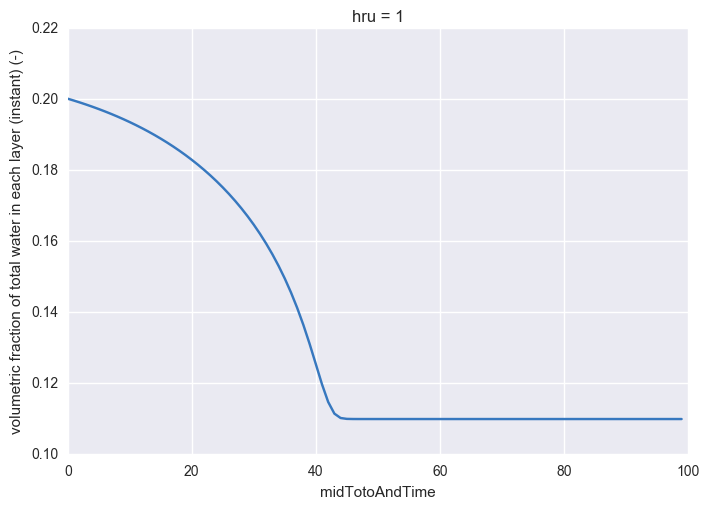

In [34]:
ds.mLayerVolFracWat[startIndex:endIndex,0].plot(label='t = {: 2d}'.format(timestep))
plt.ylabel('{} ({})'.format(ds.mLayerVolFracWat.long_name, ds.mLayerVolFracWat.units))

In this case the x-axis simply shows the index, which is not really what we want. We would really like to plot the location of the values in the column. This is provided by `ds.mLayerHeight`, so we can replot this as

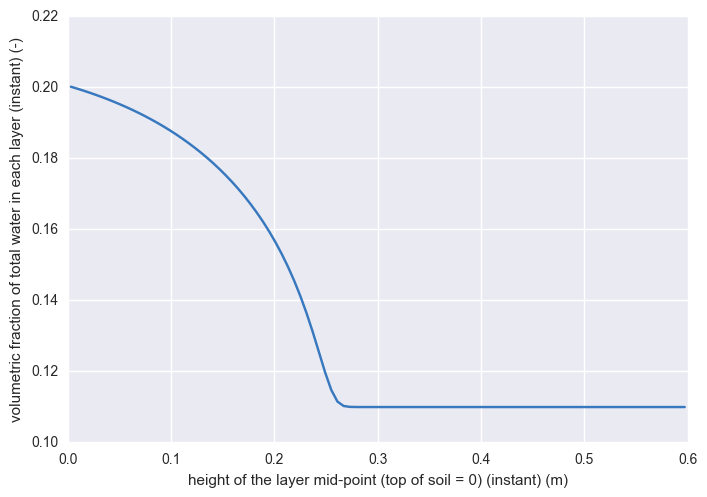

In [35]:
plt.plot(ds.mLayerHeight[startIndex:endIndex], 
         ds.mLayerVolFracWat[startIndex:endIndex,0], 
         label='t = {: 2d}'.format(timestep))
plt.ylabel('{} ({})'.format(ds.mLayerVolFracWat.long_name, ds.mLayerVolFracWat.units))
plt.xlabel('{} ({})'.format(ds.mLayerHeight.long_name, ds.mLayerHeight.units))

We can now reproduce the diagnostic plots in `summaTestCases/verification/zFigures/syntheticTestCase_celia1990.png`. The time steps that are being plotted are 10, 32 and 49 (or 9, 31, and 48 in python, so we subtract 1).

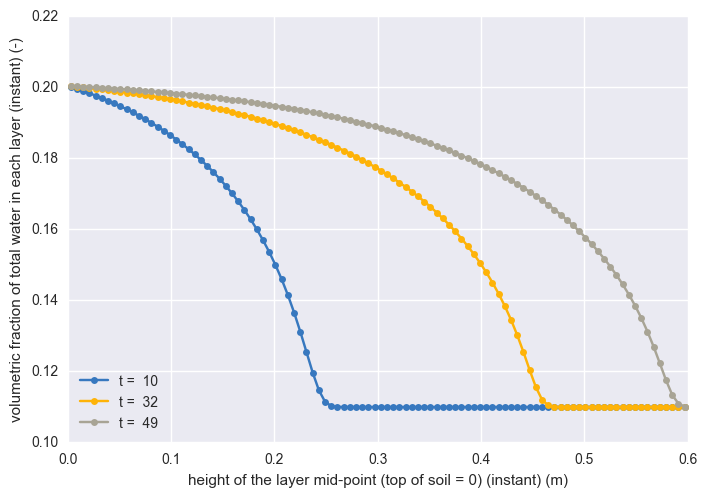

In [48]:
for timestep in [9,31,48]:
    layers = ds.nLayers[timestep].values[0]
    startIndex = ds.midTotoStartIndex[timestep].values[0] - 1
    endIndex = startIndex + layers
    plt.plot(ds.mLayerHeight[startIndex:endIndex], 
             ds.mLayerVolFracWat[startIndex:endIndex,0],
             marker='o', markersize=5,
             label='t = {: 2d}'.format(timestep+1))
plt.ylabel('{} ({})'.format(ds.mLayerVolFracWat.long_name, ds.mLayerVolFracWat.units))
plt.xlabel('{} ({})'.format(ds.mLayerHeight.long_name, ds.mLayerHeight.units))
plt.legend(loc=3)

Note that when we plot the `mLayerMatricHead` that the dimension is `midSoilAndTime`, so we should use the corresponding index variable.

In [41]:
ds.mLayerMatricHead

<xarray.DataArray 'mLayerMatricHead' (midSoilAndTime: 12720, hru: 1)>
array([[ -7.720693e-01],
       [ -8.222997e-01],
       [ -8.799407e-01],
       ..., 
       [  9.969210e+36],
       [  9.969210e+36],
       [  9.969210e+36]])
Coordinates:
  * hru      (hru) int32 1
Dimensions without coordinates: midSoilAndTime
Attributes:
    long_name: matric head of water in the soil (instant)
    units: m

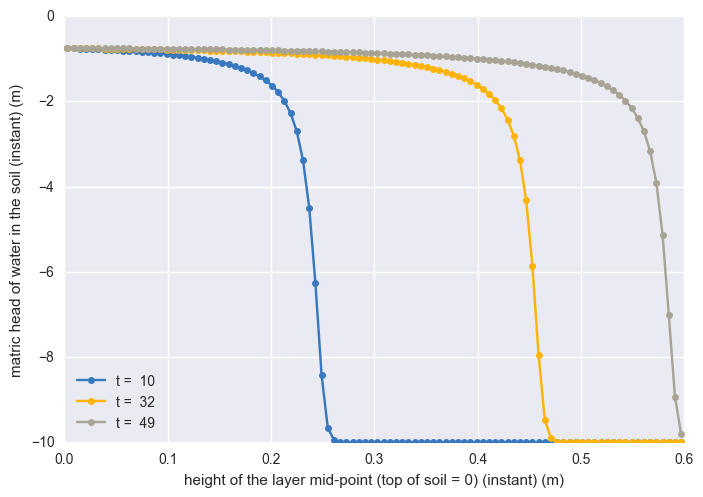

In [49]:
for timestep in [9,31,48]:
    layers = ds.nLayers[timestep].values[0]
    startIndex = ds.midSoilStartIndex[timestep].values[0] - 1
    endIndex = startIndex + layers
    plt.plot(ds.mLayerHeight[startIndex:endIndex], 
             ds.mLayerMatricHead[startIndex:endIndex,0],
             marker='o', markersize=5,
             label='t = {: 2d}'.format(timestep+1))
plt.ylabel('{} ({})'.format(ds.mLayerMatricHead.long_name, ds.mLayerMatricHead.units))
plt.xlabel('{} ({})'.format(ds.mLayerHeight.long_name, ds.mLayerHeight.units))
plt.legend(loc=3)

Try plotting some of the other variables yourself as well as some of the variables that are specified at the interfaces between layers.